In [1]:
from common_imports import *
from data_loader import fetch_historical_order_book
from liquidity_risk import *
from forecast_models import *
from plotters import *

# MSCI World Accumulating ETF

In [2]:
ticker = "WPEA.PA"
order_book_df = fetch_historical_order_book(ticker)

In [3]:
order_book_df["Spread"].describe()

count    1352.000000
mean        0.010717
std         0.007795
min         0.000300
25%         0.006600
50%         0.008600
75%         0.011925
max         0.085000
Name: Spread, dtype: float64

In [4]:
liquidity_summary(order_book_df)

{'Average Spread': np.float64(0.01072995708880588),
 'Amihud Illiquidity': np.float64(3.0989009264514785e-05),
 'Kyle Lambda': np.float64(3.884459770194215e-06),
 'Corwin-Schultz Spread': np.float64(0.0006673171447909726),
 'Roll Impact': 'Positive autocovariance detected. Avg Price Change: 0.0049',
 'Pastor-Stambaugh Liquidity Measure': np.float64(-5.090152563523107e-06),
 'Turnover Ratio': np.float64(0.17062814700521697),
 'Hasbrouck Lambda': np.float64(-9.795937811550625e-09),
 'Hurst Exponent': np.float64(0.740098426325972),
 'Execution Cost': np.float64(2.794387871739406),
 'Market Impact': Market Impact (Linear)            0.278366
 Market Impact (Non-Linear)        0.001576
 Market Impact (Almgren-Chriss)    0.004368
 dtype: float64,
 'Average Resilience': Datetime
 2025-01-09 11:30:00+01:00   -23.529137
 2025-01-09 11:45:00+01:00   -44.445311
 2025-01-09 12:00:00+01:00   -22.222656
 2025-01-09 12:15:00+01:00   -30.303475
 2025-01-09 12:30:00+01:00   -18.518716
                 

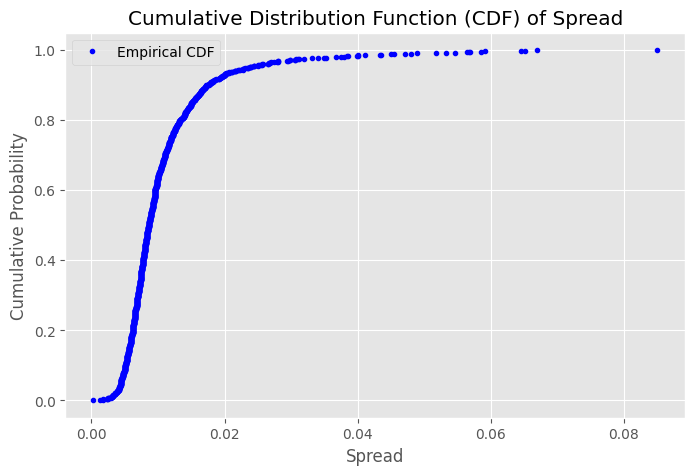

In [5]:
plot_spread_cdf(order_book_df)

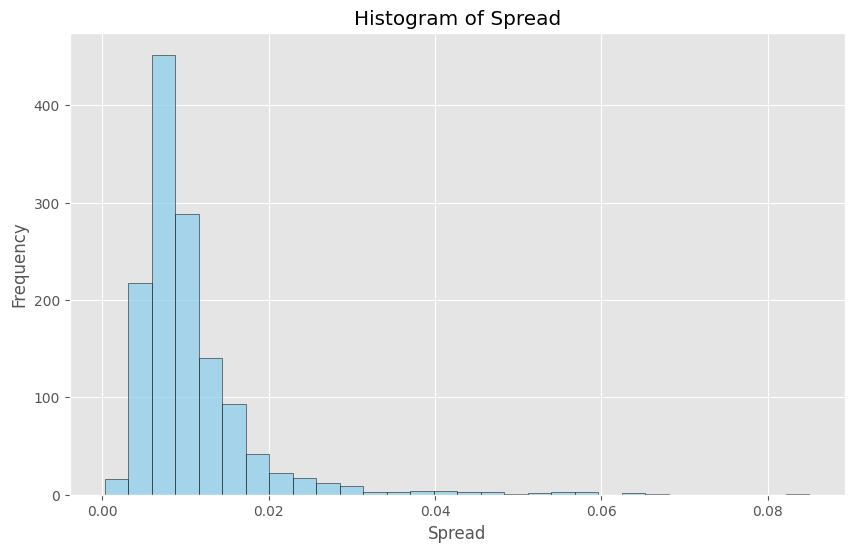

In [6]:
plot_spread_hist(order_book_df)

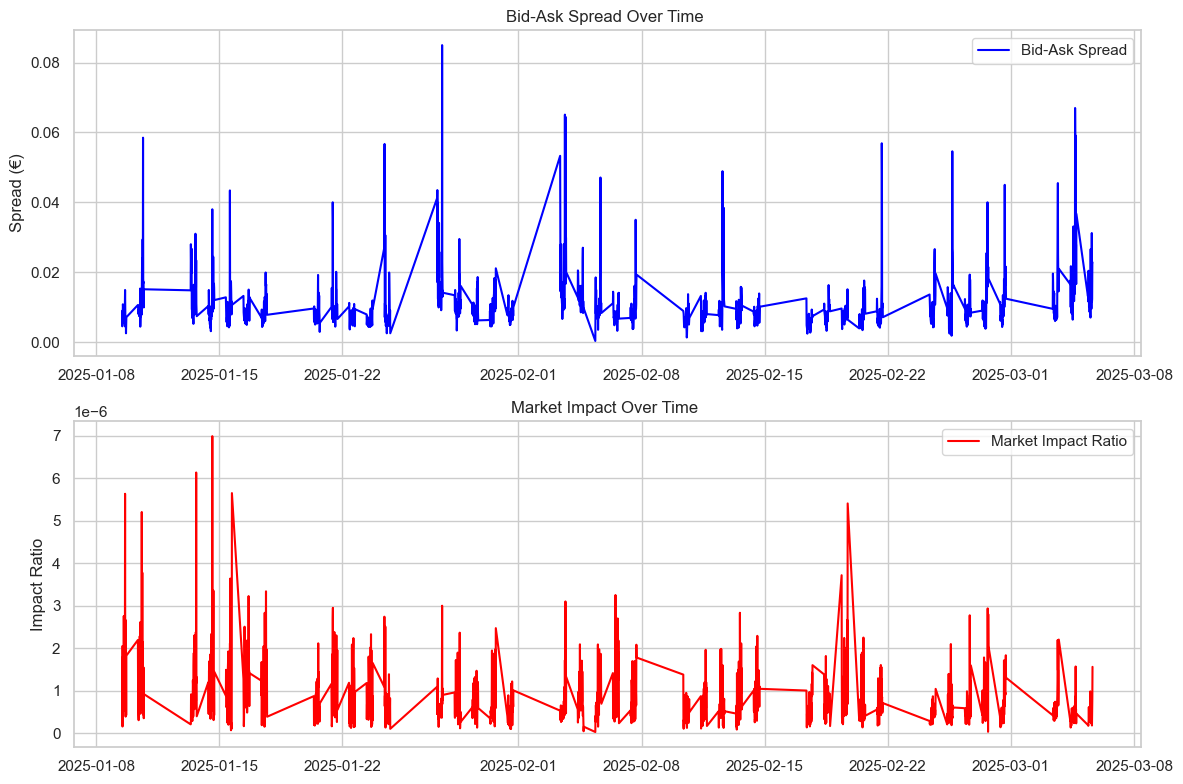

In [7]:
plot_liquidity_trends(order_book_df)

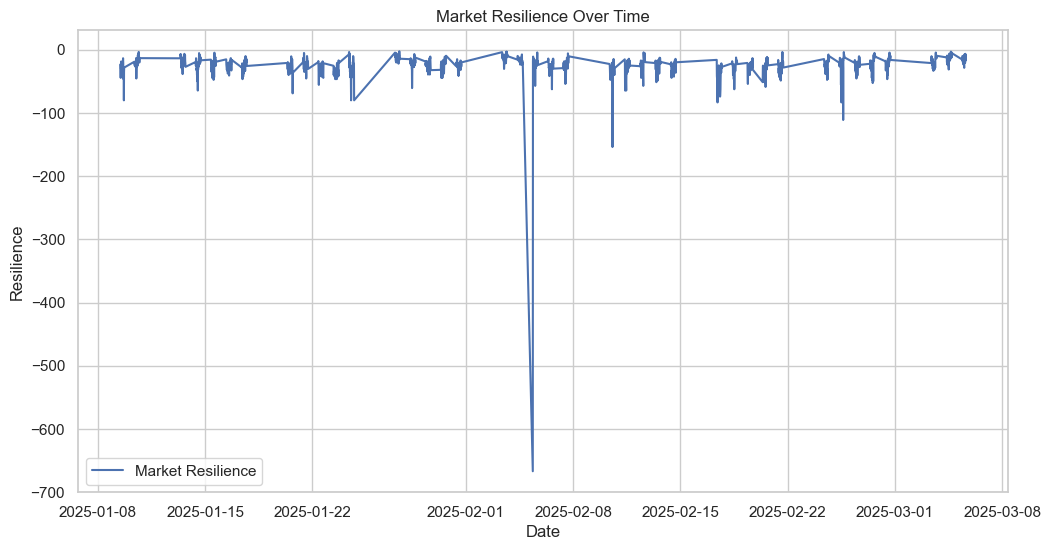

In [8]:
plot_market_resilience(order_book_df)

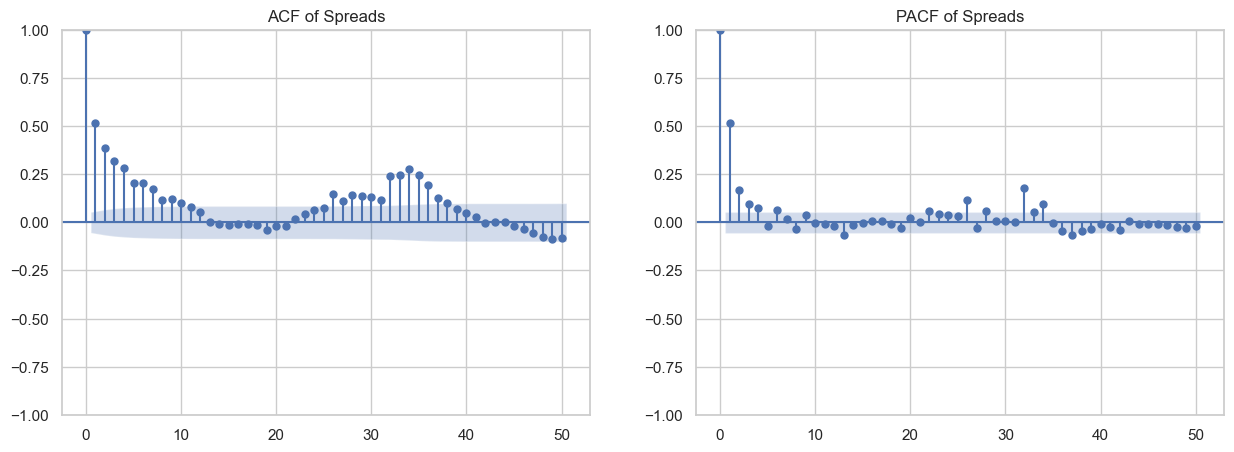

In [9]:
plot_acf_and_pacf(order_book_df)

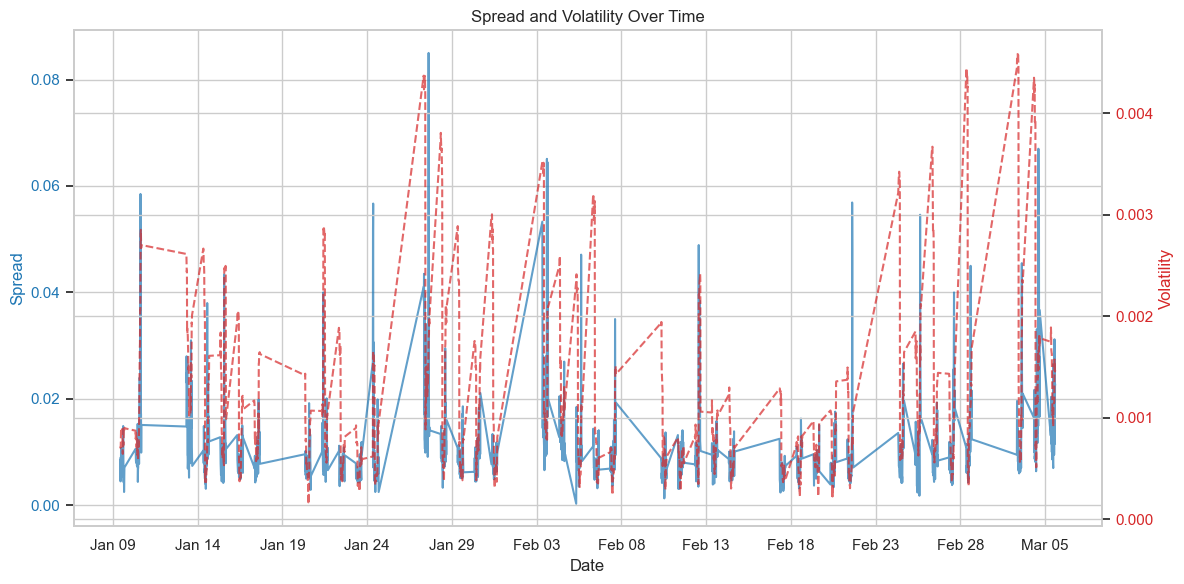

In [10]:
plot_spreads_and_volatility(order_book_df)

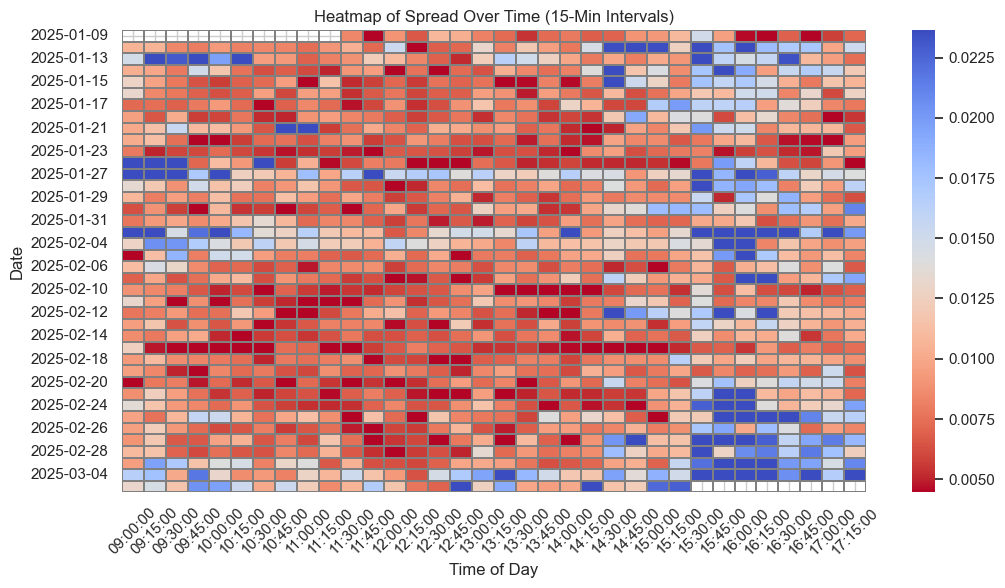

In [11]:
plot_spread_heatmap(order_book_df)

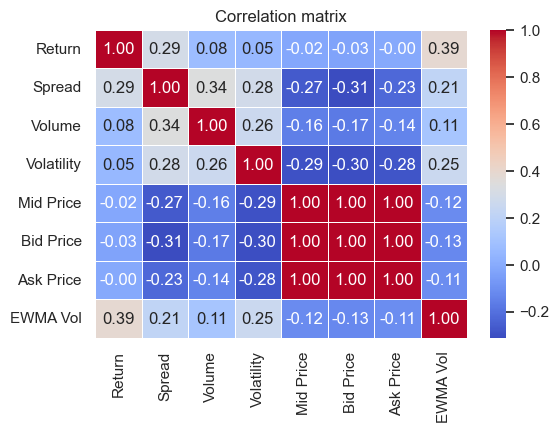

In [12]:
plot_correlation_heatmap(order_book_df)

XGBoost

Fitting 10 folds for each of 50 candidates, totalling 500 fits


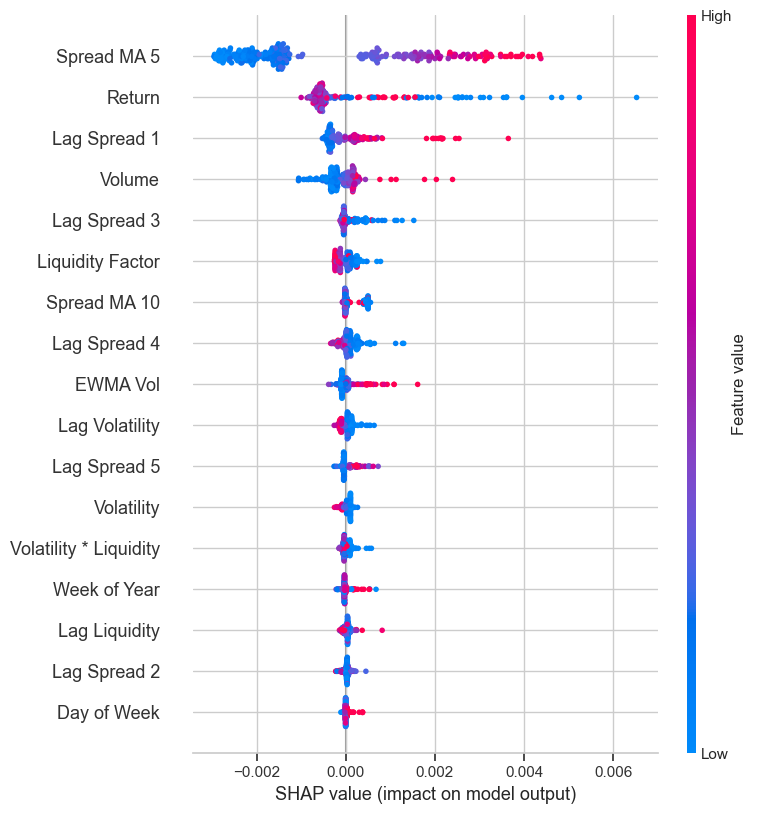

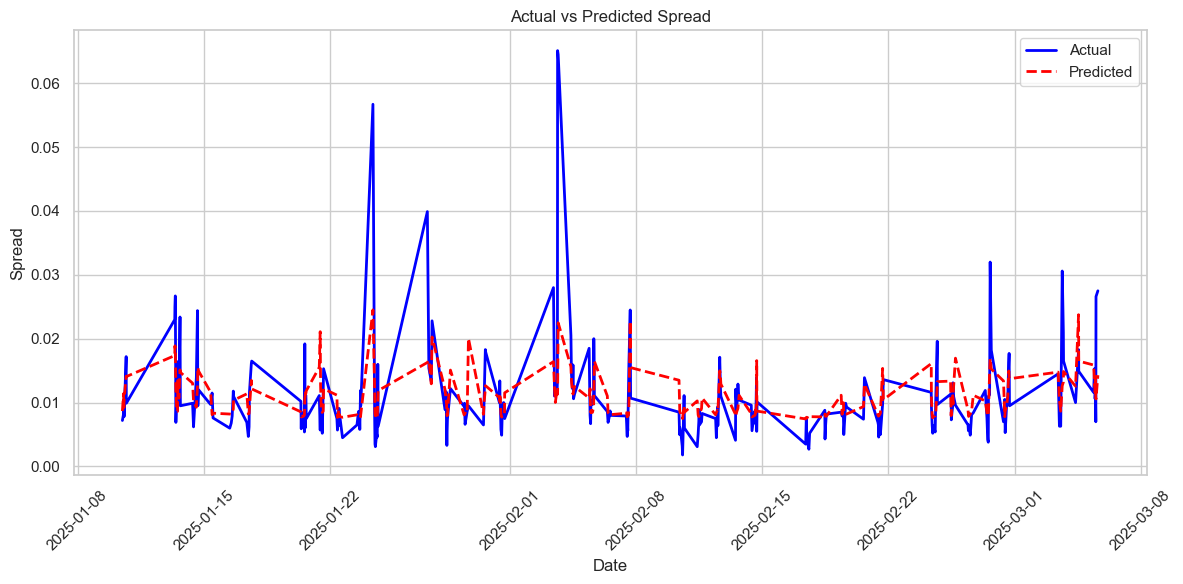

In [13]:
#reload fresh order book
order_book_df = fetch_historical_order_book(ticker)
add_ewma_volatility(order_book_df)
mae, mape, r2, results = train_xgboost_model_CV(order_book_df)
plot_forecast_vs_actual(results)

In [29]:
print("R2 : " + str(r2) + "; " + "MAE : "+ str(mae) + "; "+ "MAPE" + str(mape))

R2 : 0.3399172340667924; MAE : 0.003612696034037126; MAPE35.8866380152743


Linear Regression

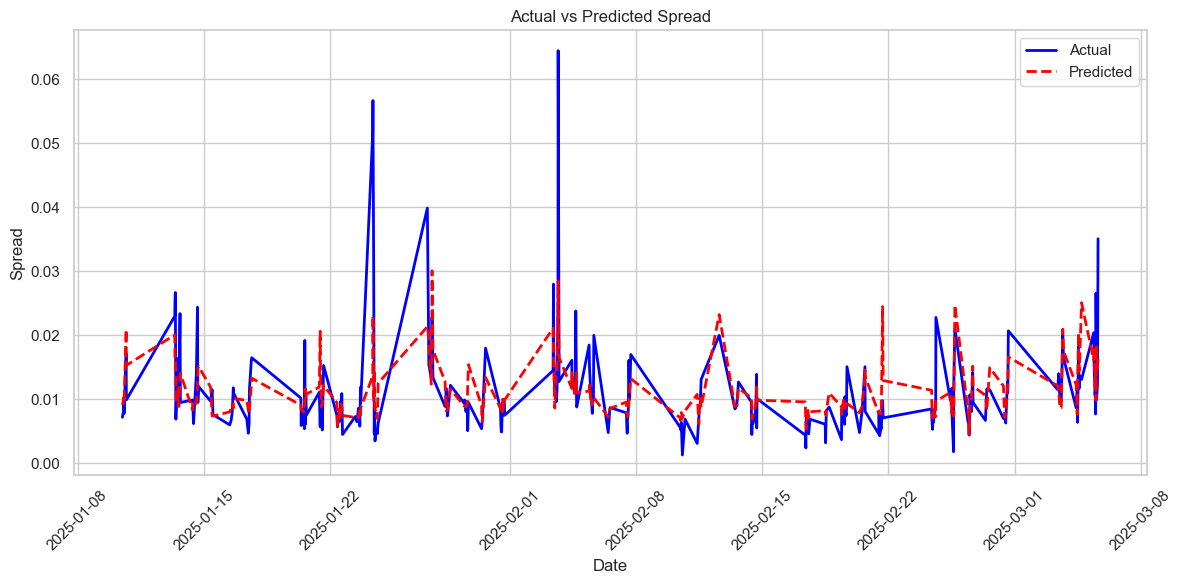

In [32]:
#reload fresh order book
order_book_df = fetch_historical_order_book(ticker)
add_ewma_volatility(order_book_df)
mae, mape, r2, results = train_linear_regression_model(order_book_df)
plot_forecast_vs_actual(results)

In [33]:
print("R2 : " + str(r2) + "; " + "MAE : "+ str(mae) + "; "+ "MAPE :" + str(mape))

R2 : 0.3813637776297544; MAE : 0.003443274853289345; MAPE :36.509635862942105
